# 3. Can you read the numbers?
#### Use neural network for image recognition 

#### [Tensorflow library from Google](https://www.tensorflow.org/tutorials/quickstart/beginner) is one of the easiest-to-use library to build neural network prediction model

In [18]:
# import the tensorflow library
import tensorflow as tf

#### The goal is to build a neural network model to predict the numbers from the image in MNIST dataset
#### MNIST dataset contains hand written images of numbers

In [19]:
# load the mnist data set from tensorflow library
mnist = tf.keras.datasets.mnist

In [20]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


#### Let's look at some images of the data set and see if you can read the number correctly as human.

0


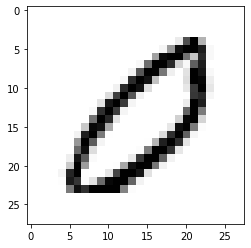

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline 

# You can change the image number from 0 to 59,999 to see other data
image_num = 965

plt.imshow(x_train[image_num], cmap='Greys')
print(y_train[image_num])

#### Neural Network is a very powerful machine learning model for image recgonition
#### Check out this [youtube video](https://www.youtube.com/watch?v=aircAruvnKk&list=RDCMUCYO_jab_esuFRV4b17AJtAw&start_radio=1&t=1044) for an introduction of the mathematics of neural network

#### Below is a simple neural network architecture for this exercise

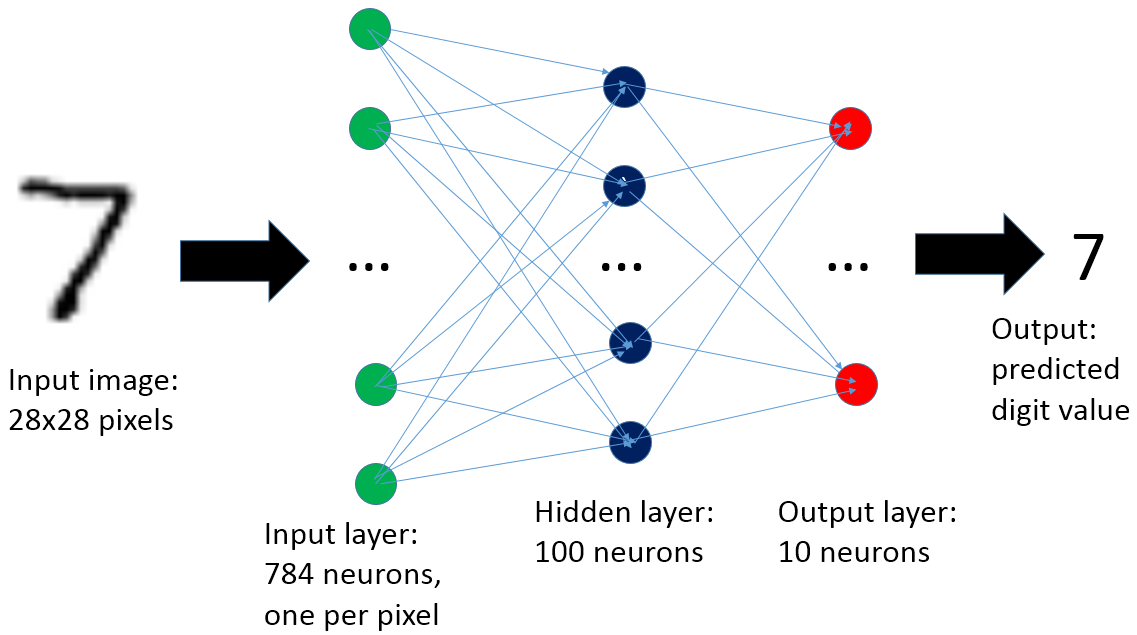

In [22]:
from IPython.display import Image
Image("MNIST_NN.png")

#### Three steps in tensor flow to building a neural network:

1. Set up the layers architecture (Dense, activation function, dropout etc)
2. Specify the objective function to optimize and the optimizer
3. Run the "model.fit" to train the model with training data

In [23]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),  
  tf.keras.layers.Dense(10, activation='softmax')
])

In [24]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train, epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 4s 75us/sample - loss: 0.2923 - accuracy: 0.9153
Epoch 2/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1382 - accuracy: 0.9592
Epoch 3/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.1041 - accuracy: 0.9676
Epoch 4/5
60000/60000 [==============================] - 4s 64us/sample - loss: 0.0841 - accuracy: 0.9744
Epoch 5/5
60000/60000 [==============================] - 4s 65us/sample - loss: 0.0728 - accuracy: 0.9771


In [26]:
# verbose =1 shows a extremely long progress bar
model.evaluate(x_test, y_test, verbose=0)

[0.07297502744100057, 0.9774]

#### Define a function to read in a image index and do:
- show the image 
- show the prediction results from model
- check whether the prediction is correct compared with the original label

In [27]:
def check_prediction(image_index):
    plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
    pred = model.predict(x_test[image_index].reshape(1, 28, 28))
    pred_label = pred.argmax()
    orig_label = y_test[image_index]
    print("original label is", orig_label)
    print("predicted label is", pred_label)
    if (pred_label == orig_label):
        print("Right prediction")
    else:
        print("Wrong prediction")

#### Let's check whether the prediction is correct for some images
#### And identify when the prediction is wrong

original label is 2
predicted label is 7
Wrong prediction


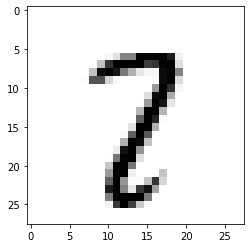

In [28]:
check_prediction(321)
# try image no. 151, 247, 259, 321, 340, 445, 449, 495, 582, 591, 605, 619, 659, 684, 691, 720, 740, 810, 839, 844, 846, 881, 938, 956, 965
# for wrong predition

In [29]:
# No need to run this cell as it is for finding where the prediction is incorrect
# this will take a minute or two to run
predictioncorrect =[]
for num in range(1000):
    if model.predict(x_test[num].reshape(1, 28, 28)).argmax() == y_test[num]:      
        predictioncorrect.append(0)
    else:
        predictioncorrect.append(1)      

In [30]:
[i for i,x in enumerate(predictioncorrect) if x == 1]

[151,
 247,
 274,
 321,
 340,
 381,
 445,
 495,
 582,
 610,
 613,
 619,
 659,
 684,
 691,
 720,
 740,
 844,
 924,
 947,
 951,
 956]